1. LGBM
2. Xgboost
3. RandomForestClassifier
4. Gradient Boosting classifier
5. Extra Tree classifier
6. Voting Classifier

# If you think this notebook is worth reading and has gained some knowledge from this,please consider upvoting my kernel.Your appreciation means a lot to me

# Import Required Module

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
import warnings
warnings.filterwarnings("ignore")
df_train=pd.read_csv('../input/airplane-accident-dataset/train.csv')
df_test=pd.read_csv('../input/airplane-accident-dataset/test.csv')
df_train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [2]:
obj=LabelEncoder()
df_train['target']=obj.fit_transform(df_train['Severity'])
df=pd.concat([df_train.drop(['Severity','target'],axis=1),df_test],axis=0,sort=False)
df.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


As we know dataset does not contain any nan value so direct preprocess the data

In [3]:
df['Total_Safety_Complaints']=pd.qcut(df['Total_Safety_Complaints'],3)
df['Cabin_Temperature']=pd.qcut(df['Cabin_Temperature'],3)
df['Violations']=df['Violations'].map({2:0,1:1,3:2,0:4,4:4,5:5})

df['Adverse_Weather_Metric']=pd.qcut(df['Adverse_Weather_Metric'],3)

df['Max_Elevation']=pd.qcut(df['Max_Elevation'],3)

df['Turbulence_In_gforces']=pd.qcut(df['Turbulence_In_gforces'],3)

In [4]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()

df['Total_Safety_Complaints']=lbl.fit_transform(df['Total_Safety_Complaints'])
df['Cabin_Temperature']=lbl.fit_transform(df['Cabin_Temperature'])
df['Max_Elevation']=lbl.fit_transform(df['Max_Elevation'])
df['Turbulence_In_gforces']=lbl.fit_transform(df['Turbulence_In_gforces'])

df['Adverse_Weather_Metric']=lbl.fit_transform(df['Adverse_Weather_Metric'])

In [5]:
col1=['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Accident_Type_Code','Control_Metric' ]
col3=['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Accident_Type_Code','Control_Metric','Turbulence_In_gforces', 'Cabin_Temperature',
        'Violations',
       'Adverse_Weather_Metric','Max_Elevation']
obj=StandardScaler()
df[col1]=obj.fit_transform(df[col1])
obj1=MinMaxScaler()
df[col3]=obj1.fit_transform(df[col3])

In [6]:
column=['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Accident_Type_Code','Control_Metric','Turbulence_In_gforces', 'Cabin_Temperature','Violations','Adverse_Weather_Metric',
       'Max_Elevation']

# LGBM

In [7]:
X=df.iloc[0:10000,:][column]
y=df_train['target']
x=df.iloc[10000:12500,:][column]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2020,test_size=0.25)
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
model = lgb.LGBMClassifier( learning_rate=0.2, n_estimators= 1000)
result=cross_val_score(estimator=model,X=X_train,y=y_train,cv=10)
print(result)
print(result.mean())

[0.94281915 0.96675532 0.95212766 0.96138482 0.972      0.96
 0.95193591 0.96390374 0.97727273 0.96390374]
0.9612103076355734


# Xgboost

In [8]:
X=df.iloc[0:10000,:][column]
y=df_train['target']
x=df.iloc[10000:12500,:][column]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2020,test_size=0.25)
import xgboost as xgb
from sklearn.model_selection import cross_val_score
model1=xgb.XGBClassifier(colsample_bylevel= 1, learning_rate= 0.1,max_depth=10, n_estimators= 1000)
result=cross_val_score(estimator=model1,X=X_train,y=y_train,cv=10)
print(result)
print(result.mean())

[0.95212766 0.96808511 0.95212766 0.96271638 0.96933333 0.96133333
 0.95594126 0.95989305 0.97593583 0.96122995]
0.9618723548897119


In [9]:
model.fit(X,y)
id=df_test['Accident_ID']
y_pred=model.predict(x)
submission=pd.DataFrame({'Accident_ID':id,'Severity':y_pred})
submission.head()
submission['Severity']=submission['Severity'].map({1:'Minor_Damage_And_Injuries',2:'Significant_Damage_And_Fatalities',3:'Significant_Damage_And_Serious_Injuries',0:'Highly_Fatal_And_Damaging'})
#submission.to_csv('submission.csv',index=False)

In [10]:
model1.fit(X,y)
id=df_test['Accident_ID']
y_pred1=model1.predict(x)
submission1=pd.DataFrame({'Accident_ID':id,'Severity':y_pred1})
submission1.head()
submission1['Severity']=submission1['Severity'].map({1:'Minor_Damage_And_Injuries',2:'Significant_Damage_And_Fatalities',3:'Significant_Damage_And_Serious_Injuries',0:'Highly_Fatal_And_Damaging'})
#submission1.to_csv('F:\\PYTHON PROGRAM\\JAISHREERAMhacker75.csv',index=False)

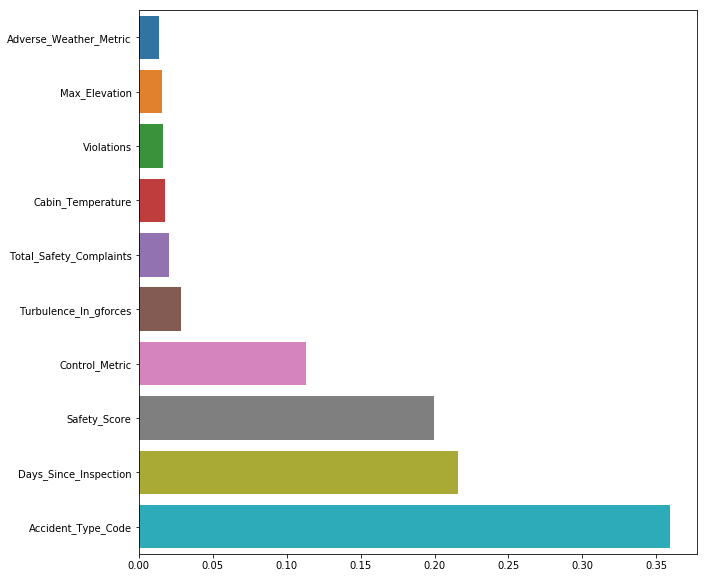

In [11]:
indices=np.argsort(model1.feature_importances_)
plt.figure(figsize=(10,10))
g = sns.barplot(y=X_train.columns[indices][:40],x = model1.feature_importances_[indices][:40] , orient='h')

In [12]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [13]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

# Gradient Boosting Classifeir

In [14]:

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [400,500],
              'learning_rate': [0.1, 0.2],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,y_train)

model2 = gsGBC.best_estimator_

# Best score
print(gsGBC.best_score_)
print(gsGBC.best_params_)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 13.3min
[Parallel(n_jobs=4)]: Done 320 out of 320 | elapsed: 22.5min finished


0.9518666666666666
{'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 8, 'max_features': 0.3, 'min_samples_leaf': 100, 'n_estimators': 500}


In [15]:
model2 = gsGBC.best_estimator_

In [16]:
model2.fit(X,y)
id=df_test['Accident_ID']
y_pred2=model2.predict(x)
submission2=pd.DataFrame({'Accident_ID':id,'Severity':y_pred2})
submission2.head()
submission2['Severity']=submission2['Severity'].map({1:'Minor_Damage_And_Injuries',2:'Significant_Damage_And_Fatalities',3:'Significant_Damage_And_Serious_Injuries',0:'Highly_Fatal_And_Damaging'})
#submission2.to_csv('F:\\PYTHON PROGRAM\\JAISHREERAMhacker36.csv',index=False)

# randomForest Classifier

In [17]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
            
              "n_estimators" :[400,500,1000],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

model3 = gsRFC.best_estimator_

# Best score
print(gsRFC.best_score_)
print(gsRFC.best_params_)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  5.3min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 13.6min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 34.1min
[Parallel(n_jobs=4)]: Done 810 out of 810 | elapsed: 35.6min finished


0.95
{'criterion': 'gini', 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


In [18]:
model3.fit(X,y)
id=df_test['Accident_ID']
y_pred3=model3.predict(x)
submission3=pd.DataFrame({'Accident_ID':id,'Severity':y_pred3})
submission3.head()
submission3['Severity']=submission3['Severity'].map({1:'Minor_Damage_And_Injuries',2:'Significant_Damage_And_Fatalities',3:'Significant_Damage_And_Serious_Injuries',0:'Highly_Fatal_And_Damaging'})
#submission3.to_csv('F:\\PYTHON PROGRAM\\JAISHREERAMhacker57.csv',index=False)

# Extra Tree classifeir

In [19]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[400,500],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,y_train)

model5 = gsExtC.best_estimator_

# Best score
print(gsExtC.best_score_)
print(gsExtC.best_params_)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   56.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  8.9min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed: 11.9min finished


0.9345333333333333
{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [20]:
model5.fit(X,y)
id=df_test['Accident_ID']
y_pred5=model5.predict(x)
submission5=pd.DataFrame({'Accident_ID':id,'Severity':y_pred5})
submission5.head()
submission5['Severity']=submission5['Severity'].map({1:'Minor_Damage_And_Injuries',2:'Significant_Damage_And_Fatalities',3:'Significant_Damage_And_Serious_Injuries',0:'Highly_Fatal_And_Damaging'})
#submission5.to_csv('F:\\PYTHON PROGRAM\\JAISHREERAMhacker36.csv',index=False)

# Voting Classifier 

You can try with both hard and soft voting

In [21]:
model = lgb.LGBMClassifier( learning_rate=0.2, n_estimators= 500,max_depth=10)
model1=xgb.XGBClassifier(colsample_bylevel= 1, learning_rate= 0.1, max_depth= 10, n_estimators= 400)
model2 = GradientBoostingClassifier(learning_rate= 0.2, loss= 'deviance', max_depth= 8, max_features =0.3, min_samples_leaf= 100, n_estimators= 500)
model3 = RandomForestClassifier(criterion= 'gini', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 500)

In [22]:
from sklearn.ensemble import VotingClassifier
votingC = VotingClassifier(estimators=[('gbc',model2),('rfc',model3),('xgb',model1)], voting='soft', n_jobs=4)
votingC.fit(X,y)
id=df_test['Accident_ID']
y_pred2=votingC.predict(x)
submission=pd.DataFrame({'Accident_ID':id,'Severity':y_pred2})
submission.head()
submission['Severity']=submission['Severity'].map({1:'Minor_Damage_And_Injuries',2:'Significant_Damage_And_Fatalities',3:'Significant_Damage_And_Serious_Injuries',0:'Highly_Fatal_And_Damaging'})
#submission.to_csv('F:\\PYTHON PROGRAM\\JAISHREERAMhacker72.csv',index=False)

# If you like my kernel please consider upvoting it

# Don't hesitate to give your suggestions in the comment section

# Thank you...